
<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Introduction à TensorFlow </h1>
<h2 style = "text-align:center" > Transfer Learning </h2>
<hr style="border-width:2px;border-color:#75DFC1">

Ce notebook est destiné à pratiquer les notions évoquées dans le dernier exercice du module sur une machine plus adaptée.

Si c'est la première fois que vous utilisez colab, n'hésitez pas à jeter un coup d'oeil sur ce [notebook](https://colab.research.google.com/drive/1jXEKOk3mRYBqFWoVwJ0ZpsRJCWj46Yxt?usp=sharing).

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 1. Traitement des données </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> Le jeu de données sur lequel nous allons travailler est constitué d'images de radiographie contenant quatre classes : **glioma tumor**, **meningioma tumor**, **no tumor**, **pituitary tumor**. 

In [1]:
!wget https://assets-datascientest.s3.eu-west-1.amazonaws.com/datasets/transferLearning_TensorFlow_brains.zip
!unzip transferLearning_TensorFlow_brains.zip

--2022-10-25 01:56:09--  https://assets-datascientest.s3.eu-west-1.amazonaws.com/datasets/transferLearning_TensorFlow_brains.zip
Resolving assets-datascientest.s3.eu-west-1.amazonaws.com (assets-datascientest.s3.eu-west-1.amazonaws.com)... 52.218.105.195, 52.218.37.176, 52.218.122.10, ...
Connecting to assets-datascientest.s3.eu-west-1.amazonaws.com (assets-datascientest.s3.eu-west-1.amazonaws.com)|52.218.105.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91002358 (87M) [application/zip]
Saving to: ‘transferLearning_TensorFlow_brains.zip’

transferLearning_Te 100%[===================>]  86.79M  76.8MB/s    in 1.1s    

2022-10-25 01:56:11 (76.8 MB/s) - ‘transferLearning_TensorFlow_brains.zip’ saved [91002358/91002358]

Archive:  transferLearning_TensorFlow_brains.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(1

Un des interêts principaux de colab est la mise à disposition d'un GPU. Utiliser un GPU permet d'accelerer grandement l'execution et donc l'entrainement de modèle de deep learning. Pour configurer le GPU (processeur graphique), il suffit de cliquer sur Edit > Notebook settings et sélectionner GPU comme accélérateur matériel.


* Exécuter la cellule suivante pour vérifier que le GPU soit bien activé.

In [2]:
import tensorflow as tf 
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please change your hardware accelerator")

Default GPU Device:/device:GPU:0


* Exécuter la cellule suivant permettant de créer un dataframe df contenant le chemin vers l'image et la classe correspondante.

In [3]:
import glob
import pandas as pd
# Trouver tous les chemins vers les fichiers qui finissent par .jpg
liste = glob.glob('./Training/*/*.jpg')
# Remplacer les \\ par /
liste = list(map(lambda x : [x, x.split('/')[2]], liste))
# Créer un DataFrame pandas
df = pd.DataFrame(liste, columns=['filepath', 'nameLabel'])
df['label'] = df['nameLabel'].replace(df.nameLabel.unique(), [*range(len(df.nameLabel.unique()))])
df.head()

,filepath,nameLabel,label
0,./Training/no_tumor/image(211).jpg,no_tumor,0
1,./Training/no_tumor/image (57).jpg,no_tumor,0
2,./Training/no_tumor/image(270).jpg,no_tumor,0
3,./Training/no_tumor/image(110).jpg,no_tumor,0
4,./Training/no_tumor/image(117).jpg,no_tumor,0




* (d) Redimensionner l'image chargée précédemment en (256, 256).

In [ ]:
## Insérez votre code ici



In [5]:
#@title Solution
import tensorflow as tf
import matplotlib.pyplot as plt
# Chemin de l'image
filepath = df.filepath[0]
# Lecture du fichier
im = tf.io.read_file(filepath)
# On décode le fichier
im = tf.image.decode_jpeg(im, channels=3)
# Redimensionnement 
tf.image.resize(im, size=(256,256))

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 9.       ,  9.       ,  9.       ],
        [ 9.       ,  9.       ,  9.       ],
        [ 9.       ,  9.       ,  9.       ],
        ...,
        [10.       , 10.       , 10.       ],
        [10.       , 10.       , 10.       ],
        [ 9.       ,  9.       ,  9.       ]],

       [[ 9.       ,  9.       ,  9.       ],
        [ 9.       ,  9.       ,  9.       ],
        [ 9.       ,  9.       ,  9.       ],
        ...,
        [10.328125 , 10.328125 , 10.328125 ],
        [10.328125 , 10.328125 , 10.328125 ],
        [ 9.       ,  9.       ,  9.       ]],

       [[ 9.       ,  9.       ,  9.       ],
        [ 9.       ,  9.       ,  9.       ],
        [ 9.       ,  9.       ,  9.       ],
        ...,
        [ 9.453125 ,  9.453125 ,  9.453125 ],
        [ 9.453125 ,  9.453125 ,  9.453125 ],
        [ 9.       ,  9.       ,  9.       ]],

       ...,

       [[12.09613  , 12.09613  , 12.09613  ],
        [12.9

## Charger le jeu de données



* (e) Séparer le jeu de données **`df.filepath`** et la variable cible **`df.label`** en un ensemble d'entraînement **X_train_path**, **y_train**, et en un ensemble de test **X_test_path**, **y_test**. Nous choisirons un rapport de 80% pour les données d'entraînements et une graine aléatoire 1234.


* (f) Charger les images de **X_test_path** redimensionnées à [256,256,3] en mémoire dans la variable **X_test**.

In [ ]:
## Insérez votre code ici



In [6]:
#@title Solution
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

X_train_path, X_test_path, y_train, y_test = train_test_split(df.filepath, df.label, train_size=0.8, random_state=456)

X_test = []
for filepath in tqdm(X_test_path):
    # Lecture du fichier
    im = tf.io.read_file(filepath)
    # On décode le fichier
    im = tf.image.decode_jpeg(im, channels=3)
    # Redimensionnement
    im = tf.image.resize(im, size=(256, 256))
    X_test.append([im])
    
X_test = tf.concat(X_test, axis=0)

100%|██████████| 574/574 [00:02<00:00, 241.29it/s]


> Maintenant que les données de test sont chargées, il est nécessaire de définir un **dataset** permettant de charger les images à chaque itération du modèle. <br>

* (g) Définir une fonction `load_image` avec comme argument `filepath` retournant une image redimensionnée en (256, 256).


* (h) Définir un dataset **`dataset_train`** de **`(X_train_path, y_train)`** à l'aide de la fonction `from_tensor_slices`.


* (i) Appliquer la fonction `load_image` à chaque valeur de **X_train_path** à l'aide de la méthode `map`. Pour que le chargement s'effectue en multi-tasking, préciser l'argument `num_parallel_calls = -1`.


* (j) Regrouper les observations sous forme de batchs de taille 32.

In [ ]:
## Insérez votre code ici



In [7]:
#@title Solution
@tf.function
def load_image(filepath, resize=(256, 256)):
    im = tf.io.read_file(filepath)
    im = tf.image.decode_png(im, channels=3)
    return tf.image.resize(im, resize)

dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))

dataset_train = dataset_train.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 2. Définition et entraînement d'un modèle </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> Les modèles de classification d'image ou de détection d'objet utilisent généralement une approche par transfer Learning.




* (a) Charger le modèle `EfficientNetB1` de **`tensorflow.keras.applications`** sous le nom **`efficientNet`**. La partie classification ne sera pas prise et l'`input_shape` sera (256, 256, 3).


* (b) Freezer les poids du modèle.


* (c) Afficher le résumé du modèle.

In [ ]:
## Insérez votre code ici



In [8]:
#@title Solution
from tensorflow.keras.applications import EfficientNetB1

# Chargement du modèle efficientNet
efficientNet = EfficientNetB1(include_top=False, input_shape=(256,256,3))

# Bloquage du blackbone
for layer in efficientNet.layers:
    layer.trainable = False
    
efficientNet.summary()

27018416/27018416 [==============================] - 0s 0us/step
Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TF

### Partie Classification

* (d) Ajouter le modèle pré-entraîné à un objet `Sequential` qui portera le nom de **model**.


* (e) Ajouter à ce modèle une couche `GlobalAveragePooling2D`.


* (f) Ajouter quelques couches `Dense` et `Dropout` au modèle.


* (g) Finir par une couche `Dense` avec 4 neurones et une fonction d'activation 'softmax'.


* (h) Afficher le résumé du modèle.

In [ ]:
## Insérez votre code ici



In [9]:
#@title Solution
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

model = Sequential()
model.add(efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 8, 8, 1280)       6575239   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

* (i) Compiler le modèle avec une fonction de perte `sparse_categorical_crossentropy`, un optimizer `'adam'` et une métrique `['accuracy']`.

In [ ]:
## Insérez votre code ici



In [10]:
#@title Solution
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Entraînement du modèle


* (j) Entraîner le modèle à l'aide la méthode `fit` sur 10 epochs en ajoutant les callbacks suivants :
    * Une sauvegarde des poids à chaque epoch.
    
    * Une diminution du taux d'apprentissage si la métrique de validation ne s'améliore pas dans les 5 dernières epochs.

In [ ]:
## Insérez votre code ici



In [11]:
#@title Solution
from tensorflow.keras import callbacks

# Savegarde automatique des poids
checkpoint = callbacks.ModelCheckpoint(filepath='checkpoint', 
                                       monitor='val_loss',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='min',
                                       save_freq='epoch')

# Réduction automatique du taux d'apprentissage
lr_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         patience=5,
                                         factor=0.1,
                                         verbose=2,
                                         mode='min')

model.fit(dataset_train, epochs=10, validation_data=(X_test, y_test), callbacks=[lr_plateau, checkpoint])

Epoch 1/10
72/72 [==============================] - ETA: 0s - loss: 0.6568 - accuracy: 0.7252

72/72 [==============================] - 88s 1s/step - loss: 0.6568 - accuracy: 0.7252 - val_loss: 0.3338 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 2/10
72/72 [==============================] - 10s 139ms/step - loss: 0.3537 - accuracy: 0.8628 - val_loss: 0.3505 - val_accuracy: 0.8711 - lr: 0.0010
Epoch 3/10
72/72 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.8837

72/72 [==============================] - 65s 911ms/step - loss: 0.3055 - accuracy: 0.8837 - val_loss: 0.2900 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 4/10
72/72 [==============================] - ETA: 0s - loss: 0.2359 - accuracy: 0.9120

72/72 [==============================] - 65s 907ms/step - loss: 0.2359 - accuracy: 0.9120 - val_loss: 0.2419 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 5/10
72/72 [==============================] - 10s 135ms/step - loss: 0.2199 - accuracy: 0.9155 - val_loss: 0.2622 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 6/10
72/72 [==============================] - 10s 136ms/step - loss: 0.1870 - accuracy: 0.9281 - val_loss: 0.2431 - val_accuracy: 0.9077 - lr: 0.0010
Epoch 7/10
72/72 [==============================] - ETA: 0s - loss: 0.1587 - accuracy: 0.9438

72/72 [==============================] - 66s 931ms/step - loss: 0.1587 - accuracy: 0.9438 - val_loss: 0.2413 - val_accuracy: 0.9251 - lr: 0.0010
Epoch 8/10
72/72 [==============================] - 10s 134ms/step - loss: 0.1596 - accuracy: 0.9412 - val_loss: 0.3003 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 9/10
72/72 [==============================] - 10s 144ms/step - loss: 0.1506 - accuracy: 0.9425 - val_loss: 0.2655 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 10/10
72/72 [==============================] - 10s 135ms/step - loss: 0.1427 - accuracy: 0.9456 - val_loss: 0.2493 - val_accuracy: 0.9164 - lr: 0.0010


$\DeclareMathOperator*{\argmax}{argmax}$

## Évaluation

* (k) Prédire la probabilité des classes du jeu de données **X_test**.


* (l) Prédire dans **y_pred** la classe la plus probable à l'aide de la fonction `argmax` de **`tensorflow`** en précisant `axis=-1`.

In [ ]:
## Insérez votre code ici



In [12]:
#@title Solution
# Probabilités renvoyées par le modèle
y_prob = model.predict(X_test, batch_size=64)

# Prédiction de la classe
y_pred = tf.argmax(y_prob, axis=-1).numpy()

9/9 [==============================] - 6s 331ms/step


* (m) Afficher le score de précision à l'aide de la fonction `accuracy_score` de **`sklearn.metrics`**.


* (n) Afficher la matrice de confusion à l'aide de la fonction `confusion_matrix` de **`sklearn.metrics`**.

In [ ]:
## Insérez votre code ici



In [13]:
#@title Solution
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy :', accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy : 0.9163763066202091


array([[ 67,   3,  12,   0],
       [  0, 172,  10,   0],
       [  2,   3, 159,   1],
       [  0,   0,  17, 128]])

* (o) Exécuter la cellule suivante pour afficher les prédictions de notre modèle sur 3 images.

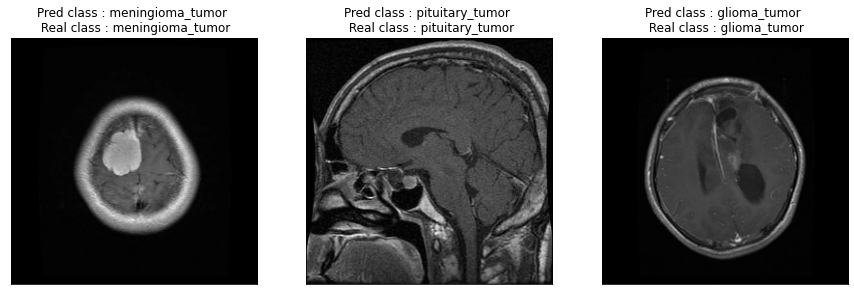

In [14]:
indices_random = tf.random.uniform([3], 0, len(X_test), dtype=tf.int32)

plt.figure(figsize=(15,7))
for i, idx in enumerate(indices_random):
    plt.subplot(1,3,i+1)
    plt.imshow(tf.cast(X_test[idx], tf.int32))
    plt.xticks([])
    plt.yticks([])
    plt.title('Pred class : {} \n Real class : {}'.format(df.nameLabel.unique()[y_pred[idx]], df.nameLabel.unique()[y_test.values[idx]]))

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > Ce qu'il faut retenir de ce module </h2> 
<hr style="border-width:2px;border-color:#75DFC1">


## Méthodologie

> Globalement, la méthodologie pour résoudre un problème à l'aide d'outils de deep learning est la suivante :
>
>1. Définir un **dataset** permettant de mettre en forme les données et de partitionner en batchs.
>
>
>2. Construire un modèle : MLP, CNN, RNN, transfer learning ...
>
>
>3. Compiler le modèle : définition d'une fonction de perte, métrique, optimizer.
>
>
>4. Entraîner le modèle. Il y'a deux manières équivalentes de le faire:
>    - Méthode **`fit`** : problème simple.
>    - Calculer le gradient de la fonction de coût puis rétropropager l'erreur : problème complexe.
>    
>   
>5. Prédiction et évaluation du modèle.



## Dataset

> TensorFlow possède un sous ensemble **`tensorflow.data.dataset`**  qui permet d'appliquer toutes les étapes de pré-processing sur les données. C'est un pipeline d'opérations appliquées sur les entrées. Un exemple :
>
> * Charger les images + redimensionner (en parallélisant les calculs).
>
>
> * Appliquer des méthodes d'augmentation de données.
>
>
> * Normaliser les données.
>
>
> * Regrouper les données en lots.



## Keras

> La version de TensorFlow 2.0+ a été construite autour du framework [**keras**](https://www.tensorflow.org/guide/keras).
>
> Vous pouvez retrouver toutes les fonctionnalités de **keras** dans **`tensorflow.keras`**. Il y'a notamment :
>
>* Les couches de neurones dans **`tensorflow.keras.layers`**. Il est possible de créer des couches personnalisées en faisant hériter la classe de la couche avec **`tensorflow.keras.layers.Layer`**.
>
>
>* Les modèles pré-entrainés dans  **`tensorflow.keras.applications`**.
>
>
>* Les fonctions de pertes dans **`tensorflow.keras.losses`**
>
>
>* Les métriques dans **`tensorflow.keras.metrics`**.
>
>
>* Les optimizers dans **`tensorflow.keras.optimizers`**.

## Callbacks


> Les rappels (***callbacks***) sont des outils qui permettent de contrôler l'entraînement et évaluation d'un modèle. Il est alors possible de connaître l'état interne d'un modèle, de le sauvegarder, d'afficher des statistiques intéressantes et même de changer des hyperparamètres pendant les étapes de l'entraînement.
>
> Les callbacks suivants peuvent être très pratique en Deep Learning :
>
> * Sauvegarder les meilleurs poids du modèle au cours de l'entraînement :
>
>```python
>callbacks.ModelCheckpoint(filepath=filepath, 
>                           monitor='val_loss',
>                           save_best_only=True,
>                           save_weights_only=False,
>                           mode='min',
>                           save_freq='epoch')
>
>```
>
> * Réduire automatiquement le learning rate :
>
>```python
>callbacks.ReduceLROnPlateau(monitor='val_loss',
>                             patience=5,
>                             factor=0.5,
>                             verbose=2,
>                             mode='min')
>```
>
> * Arrêter l'entraînement si le modèle n'évolue plus (très pratique pour ne pas gérer le nombre d'epoch) :
>
>```python
>callbacks.EarlyStopping(monitor='val_loss',
>                         patience=8,
>                         mode='min',
>                         restore_best_weights=True)
>```